<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this homework notebook, please modify only the cells that start with:</font>

```python
# modify this cell
```

# 1. Die Rolls

Dice throws are another easy experiment to conduct. But first let us look at how we can reproduce the sampled data. To do this we can set the `seed` value of the random number generator to a chosen value.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
np.random.seed(666)
print(np.random.randint(9))

2


If we run the experiment again, we might get a different set of numbers.

In [16]:
print(np.random.randint(9))

6


In [17]:
np.random.seed(666)
print(np.random.randint(9))
print(np.random.randint(9))

2
6


## Exercise
Now consider a fair die. Each face has probability $\frac16$. We simulate $n$ die rolls and plot the empirical probability of each face, alongside the theoretical probability. 

In [18]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,1000),continuous_update=False)
def probability_plot(n):
    """ 
        input: n (generate n random die rolls)
        output: Count (counting the occurance of each event )
    """
    #
    # YOUR CODE HERE
    #
    # Simulate n die rolls
    rolls = np.random.randint(1, 7, n)
    
    # Count the occurrences of each face
    Count = np.zeros((6, n))
    for i in range(6):
        Count[i] = np.cumsum(rolls == (i + 1))

    # plot the empirical values
    for i in range(6):
        Prob = Count[i]/np.arange(1,n+1)
        plt.plot(np.arange(1, n + 1), Prob, linewidth=2.0, label='Face '+str(i+1))
    
    plt.plot(range(0, n), [1 / 6] * n, 'k', linewidth=3.0, label='Theoretical probability')
    plt.title("Empirical and theoretical probabilities of the 6 faces")
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=505, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

Next consider the event $E=\{2,4,6\}$ that the outcome is even. Clearly $P(E)=\frac36=\frac{1}{2}=0.5$.

The next cell simulates $n$ die rolls and plots the theoretical and empirical probabilities of $E$.

In [19]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),continuous_update=False)
def probability_plot_B(n):
    """ 
        input: n (generate n random die rolls)
        output: Prob_E (calculating the probability of even throw's)
        hint: counting the events of even numbers
    """
    #
    # YOUR CODE HERE
    #
    rolls=np.random.randint(1,7,n)
    Count=np.cumsum(rolls%2==0)
    Prob_E=Count/np.arange(1,n+1)
    

    # plot
    plt.plot(range(1,n+1),Prob_E, 'b', linewidth= 2,label='Empirical probability')    
    plt.plot(range(1,n+1), [1 / 2] * n, 'k', linewidth= 2, label='Theoretical probability')
    
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.title("Odds of rolling an even number")
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=5005, description='n', max=10000, min=10), Output()), _dom_classes=('wid…

# 2. Conditional Probability and Baye's Rule


## Exercise

There are two urns $A$ and $B$. Urn $A$ contains $r_A$ red balls and $w_A$ white balls whereas urn $B$ contains $r_B$ red balls and $w_B$ white balls. One of the urns is picked at random and then one ball is picked at random from this urn. Write a function **conditional_probability** that calculates the conditional probability that the randomly chosen ball belonged to urn $A$ given that it is white. Assume that $\frac{r_A}{w_A}\neq\frac{r_B}{w_B}$.

<font  style="color:blue"> **Code**</font>
```python
rA, wA, rB, wB = 1., 2., 2., 1.
conditional__probability(rA, wA, rB, wB) 
```

<font  style="color:magenta"> **Output**</font>
```
0.6666666666666666
```

In [6]:
# modify this cell

def conditional__probability(rA, wA, rB, wB):
    # inputs: all of them are of type 'float'
    # output: a variable of type 'float'
    
    #
    # YOUR CODE HERE
    #
    # Calculate the probability of selecting urn A
    prob_A = 1 / 2
    
    # Calculate the probability of selecting a white ball from urn A
    prob_white_given_A = wA / (rA + wA)
    
    # Calculate the probability of selecting urn B
    prob_B = 1 / 2
    
    # Calculate the probability of selecting a white ball from urn B
    prob_white_given_B = wB / (rB + wB)
    
    # Calculate the conditional probability using Bayes' theorem
    conditional_prob = (prob_A * prob_white_given_A) / ((prob_A * prob_white_given_A) + (prob_B * prob_white_given_B))
    
    return conditional_prob


In [23]:
assert( abs(conditional__probability(2., 4., 3., 3.) -0.5714285714285715) < 10**-5)  
assert( abs(conditional__probability(1., 3., 5., 2.) -0.7241379310344829) < 10**-5) 

#
# AUTOGRADER TEST - DO NOT REMOVE
#


# 3. Conditional probability analysis for math scores


Please try the same analysis for the students math scores following the same process conducted for Portuguese scores shown in Sec. 5 in "Experiment 2_Lecture" Notebook. **Insert new cells below to finish the process.**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# modify this cell

data_math = pd.read_csv("E:\概率论\Experiment 2\student-mat.csv")

 we will use the following two
- `G3` - final grade related with the course subject, Math or Portuguese (numeric: from 0 to 20, output target)  
- `studytime` - weekly study time (numeric: 1 : < 2 hours, 2 : 2 to 5 hours, 3 : 5 to 10 hours, or 4 : > 10 hours)  

In [22]:
attributes = ["G3","studytime"]
data_math = data_math[attributes]

We are interested in the relationship between study-time and grade performance, but to start, let us view each attribute individually. 

The probability that a student's study-time falls in an interval can be approximated by

$${P(\text{study interval}) = \frac{\text{Number of students with this study interval}}{Total\ number\ of\ students}}$$

This is an emperical estimate, and in later lectures we will reason why this is a valid assumption.

Text(0.5, 0, 'Study Interval')

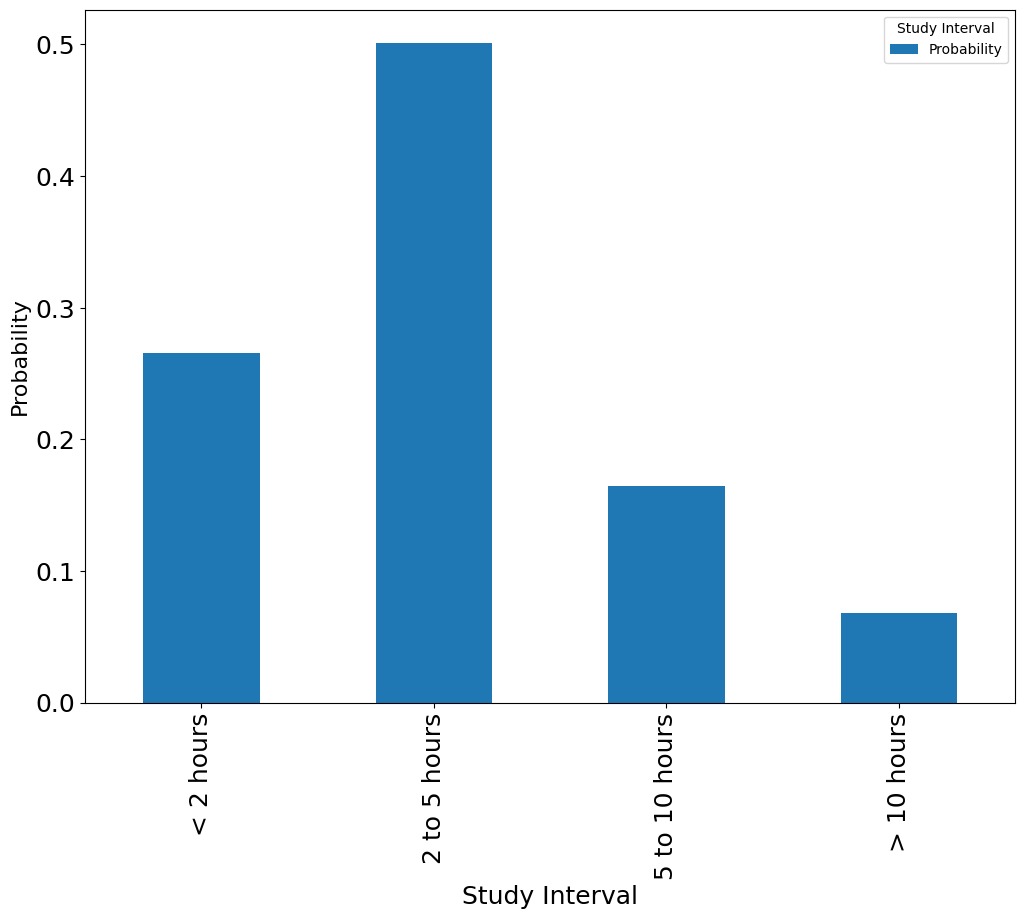

In [10]:
data_temp = data_math["studytime"].value_counts()
P_studytime = pd.DataFrame((data_temp/data_temp.sum()).sort_index())
P_studytime.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_studytime.columns = ["Probability"]
P_studytime.columns.name = "Study Interval"

P_studytime.plot.bar(figsize=(12,9),fontsize=18)
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Study Interval",fontsize=18)

Note that the largest number of students studied between two and five hours, and the smallest studied over 10 hours. 

Let us call scores of at least 15 "high". The probability of a student getting a high score can be approximated by

$$P(\text{high score}) = \frac{\text{Number of students with high scores}}{\text{Total number of students}}$$

Score  Probability
Low        0.81519
High       0.18481


Text(0, 0.5, 'Probability')

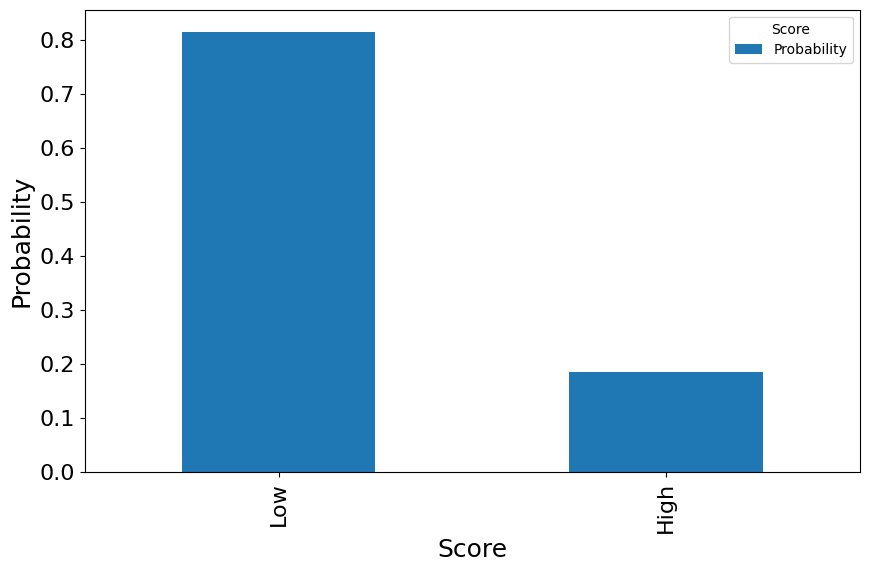

In [11]:
data_temp = (data_math["G3"]>=15).value_counts()
P_score15_p = pd.DataFrame(data_temp/data_temp.sum())
P_score15_p.index = ["Low","High"]
P_score15_p.columns = ["Probability"]
P_score15_p.columns.name = "Score"
print(P_score15_p)
P_score15_p.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Score",fontsize=18)
plt.ylabel("Probability",fontsize=18)

Proceeding to more interesting observations, suppose we want to find the probability of the various study-intervals when the student scored high. By conditional probability, this can be calculated by:

$$P(\text{study interval}\ |\ \text{highscore})=\frac{\text{Number of students with study interval AND highscore}}{\text{Total number of students with highscore}}$$

Probability of study interval given that the student gets a highscore:


Text(0, 0.5, 'Probability')

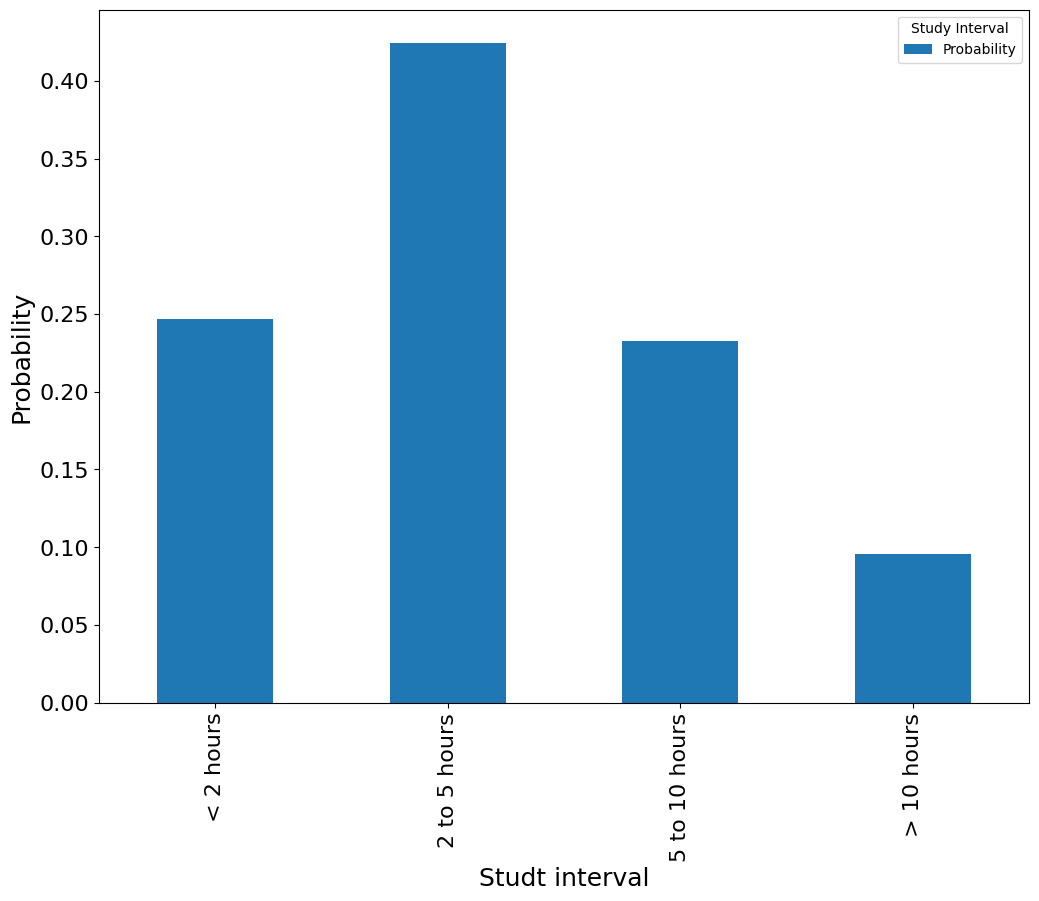

In [12]:
score = 15
data_temp = data_math.loc[data_math["G3"]>=score,"studytime"]
P_T_given_score15= pd.DataFrame((data_temp.value_counts()/data_temp.shape[0]).sort_index())
P_T_given_score15.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_T_given_score15.columns = ["Probability"]
print("Probability of study interval given that the student gets a highscore:")
P_T_given_score15.columns.name="Study Interval"
P_T_given_score15.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Studt interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)

The above metric is something we can only calculate after the students have obtained their results. But how about the other way? What if we want to **predict** the probability that a student gets a score greater than 15 given that they studied for a particular period of time . Using the estimated values we can use the **Bayes rule** to calculate this probability.

$$P(\text{student getting a highscore}\ |\  \text{study interval})=\frac{P(\text{study interval}\ |\ \text{the student scored high})P(\text{highscore})}{P(\text{study interval})}$$

Probability of high score given study interval :


Text(0, 0.5, 'Probability')

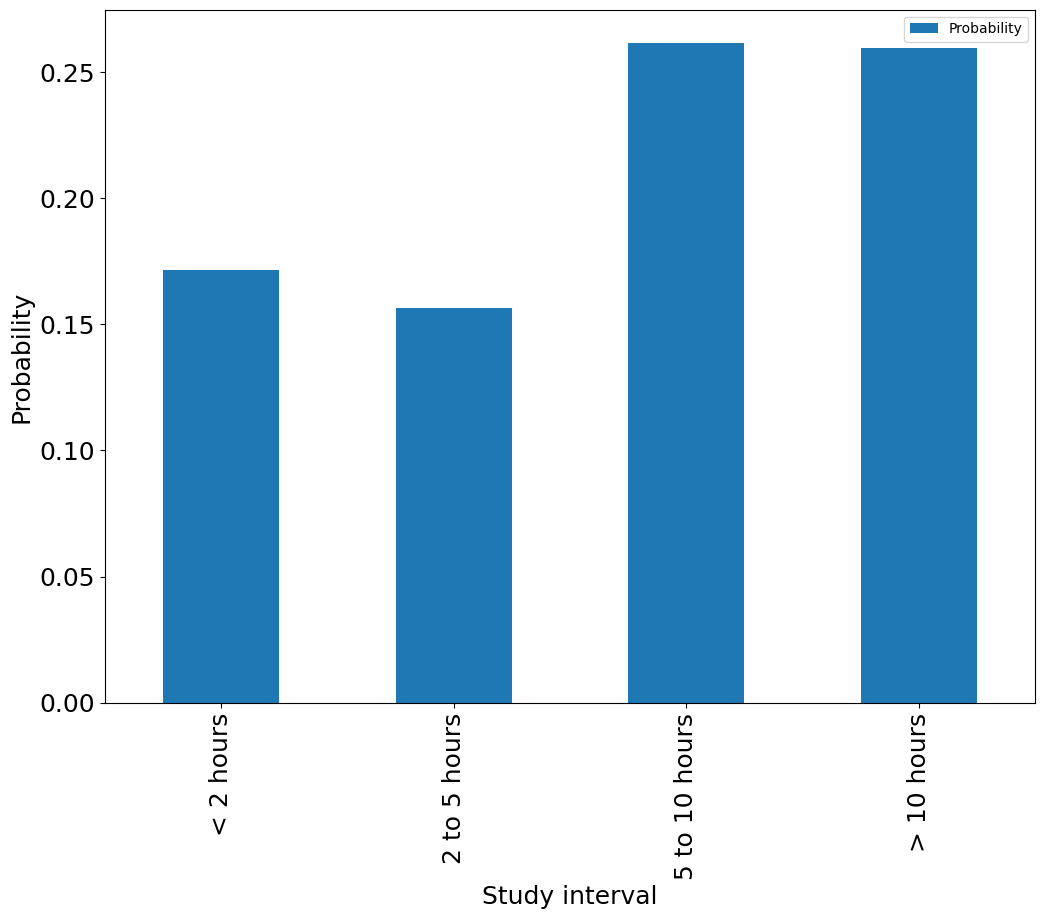

In [13]:
P_score15_given_T_p = P_T_given_score15 * P_score15_p.loc["High"] / P_studytime
print("Probability of high score given study interval :")
pd.DataFrame(P_score15_given_T_p).plot.bar(figsize=(12,9),fontsize=18).legend(loc="best")
plt.xlabel("Study interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)

Do you find the results surprising? Roughly speaking, the longer students study, the more likely they are to score high. However, once they study over 10 hours, their chances of scoring high decline. 